In [1]:
# A related function that is very useful is ifelse. This function takes three arguments: a logical and two possible answers

In [6]:
a <- 0
ifelse(a > 0, 1/a, NA)
# The function is particularly useful because it works on vectors
a <- c(0, 1, 2, -4, 5)
result <- ifelse(a > 0, 1/a, NA)
result

[1] NA

[1]  NA 1.0 0.5  NA 0.2

In [10]:
# this function can be used to replace specific value with integers or something
# install.packages('na_example')
data(na_example)

Warning message in data(na_example):
"data set 'na_example' not found"

In [11]:
no_nas <- ifelse(is.na(na_example), 0, na_example) 
sum(is.na(no_nas))
#> [1] 0

ERROR: Error in ifelse(is.na(na_example), 0, na_example): object 'na_example' not found


In [12]:
    # any and all
z <- c(TRUE, TRUE, FALSE)
any(z)
#> [1] TRUE
all(z)

[1] TRUE

[1] FALSE

In [14]:
avg <- function(x){
  s <- sum(x)
  n <- length(x)
  s/n
}
x <- 1:100
identical(mean(x), avg(x))

[1] TRUE

In [15]:
#functions are objects

### Funtionals
`Functionals are functions that help us apply the same function to each entry in a vector, matrix, data frame, or list`

#### The function sapply permits us to perform element-wise operations on any function

In [16]:
x <- 1:10
sapply(x, sqrt)

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

`Other functionals are apply, lapply, tapply, mapply, vapply, and replicate.` 
`We mostly use `**sapply, apply, and replicate**

In [22]:
# practising apply, sapply, replicate, map, map2, pmap
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# try to use tidyverse map and its siblings
http://www.rebeccabarter.com/blog/2019-08-19_purrr/

In [35]:
# map will always return a list
# addTen <- function(.x) {
#   return(.x + 10)
# }
# or this, both same
addTen <- function(x) {
  return(x + 10)
}

In [36]:
map(.x = c(1, 4, 7), 
    .f = addTen)

[[1]]
[1] 11

[[2]]
[1] 14

[[3]]
[1] 17

In [37]:
# or this
map(c(1, 4, 7), addTen)

[[1]]
[1] 11

[[2]]
[1] 14

[[3]]
[1] 17

In [173]:
map(data.frame(a = 1, b = 4, c = 7), addTen) # this iterate through every column in dataframe

$a
[1] 11

$b
[1] 14

$c
[1] 17

In [38]:
#checking arguments,
args(map)

function (.x, .f, ...) 
NULL

In [175]:
# other map functions, map_*** will return vectors
map_dbl(c(1, 4, 7), addTen)
map_chr(c(1, 4, 7), addTen)
# to return df, use map_df()
map_df(c(1, 4, 7), function(.x) {
  return(data.frame(old_number = .x, 
                    new_number = addTen(.x)))
})# anonymous function used here

[1] 11 14 17

[1] "11.000000" "14.000000" "17.000000"

old_number new_number
1 1          11        
2 4          14        
3 7          17

In [46]:
# Another function to be aware of is modify(), 
# which is just like the map functions, but always returns an object the same type as the input object

In [48]:
modify(c(1, 4, 7), addTen)
modify(list(1, 4, 7), addTen)
modify(data.frame(a = c(1, 4, 7)), addTen)

[1] 11 14 17

[[1]]
[1] 11

[[2]]
[1] 14

[[3]]
[1] 17

a 
1 11
2 14
3 17

In [49]:
# Modify also has a pretty useful sibling, modify_if(), 
# that only applies the function to elements that satisfy a specific criteria
# (specified by a “predicate function”, the second argument called .p). 
# For instance, the following example only modifies the third entry since it is greater than 5

In [50]:
modify_if(.x = list(1, 4, 7), 
          .p = function(x) x > 5,
          .f = addTen)

[[1]]
[1] 1

[[2]]
[1] 4

[[3]]
[1] 17

In [51]:
modify_if(.x = c(1, 4, 7), 
          .p = function(x) x > 5,
          .f = addTen)

[1]  1  4 17

In [60]:
# The tilde-dot shorthand for functions
# replacing this with
# function(x) {
#   x + 10
# }
# ~{.x + 10}

In [178]:
map_dbl(c(1, 4, 7), ~{.x + 10})# . has to be ther, that mean implicit data

[1] 11 14 17

In [67]:
#some practical uses

In [64]:
library(gapminder)
gapminder_orig <- gapminder


In [65]:
dim(gapminder)

[1] 1704    6

In [66]:
head(gapminder)

country     continent year lifeExp pop      gdpPercap
1 Afghanistan Asia      1952 28.801   8425333 779.4453 
2 Afghanistan Asia      1957 30.332   9240934 820.8530 
3 Afghanistan Asia      1962 31.997  10267083 853.1007 
4 Afghanistan Asia      1967 34.020  11537966 836.1971 
5 Afghanistan Asia      1972 36.088  13079460 739.9811 
6 Afghanistan Asia      1977 38.438  14880372 786.1134

In [185]:
# map_ can iterate over columns in df
gapminder %>% map_chr(class) # summarizing each column class

country continent      year   lifeExp       pop gdpPercap 
 "factor"  "factor" "integer" "numeric" "integer" "numeric"

In [76]:
# getting distinct values
gapminder %>% map(n_distinct)
#or
gapminder %>% map_dbl(n_distinct)

$country
[1] 142

$continent
[1] 5

$year
[1] 12

$lifeExp
[1] 1626

$pop
[1] 1704

$gdpPercap
[1] 1704

country continent      year   lifeExp       pop gdpPercap 
      142         5        12      1626      1704      1704

In [81]:
# more complex usage
#map_df will return a dataframe, hence using this
gapminder %>% map_df(~{
    data.frame(distinct=n_distinct(.x), classType = class(.x))
})

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"

distinct classType
1  142     factor   
2    5     factor   
3   12     integer  
4 1626     numeric  
5 1704     integer  
6 1704     numeric

In [99]:
# in above example we lost the original variable name, we can get that by using id
gapminder %>% map_df(~{
    data.frame(distinct=n_distinct(.x), classType = class(.x))
}, .id = 'columnName')

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"

columnName distinct classType
1 country     142     factor   
2 continent     5     factor   
3 year         12     integer  
4 lifeExp    1626     numeric  
5 pop        1704     integer  
6 gdpPercap  1704     numeric

In [97]:
# take the first element of the gapminder data
.x <- gapminder %>% pluck(1)
# look at the first 6 rows
head(.x)

[1] Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan
142 Levels: Afghanistan Albania Algeria Angola Argentina Australia ... Zimbabwe

In [94]:
data.frame(n_distinct = n_distinct(.x),
           class = class(.x))

n_distinct class 
1 142        factor

In [98]:
# pluck extract column values by their position

#### map2, iterates over two data objects (list, df or vector)

In [101]:
continent_year <- gapminder %>% distinct(continent, year)
continent_year %>% head

continent year
1 Asia      1952
2 Asia      1957
3 Asia      1962
4 Asia      1967
5 Asia      1972
6 Asia      1977

In [111]:
#extracting the vectors separately
continents <- continent_year %$% continent %>% as.character # prevent fct 
years <- continent_year %$% year

`Before jumping straight into the map function, it’s a good idea to first figure out what the code will be for just first iteration`

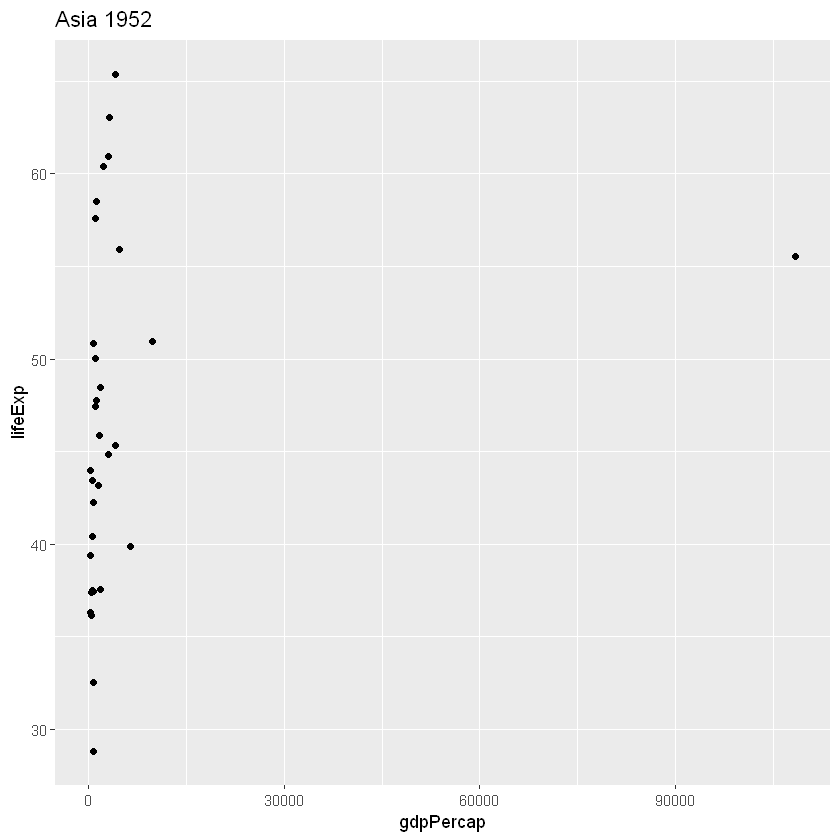

In [112]:
# try to figure out the code for the first example
.x <- continents[1]
.y <- years[1]
# make a scatterplot of GDP vs life expectancy in all Asian countries for 1952
gapminder %>% 
  filter(continent == .x,
         year == .y) %>%
  ggplot() +
  geom_point(aes(x = gdpPercap, y = lifeExp)) +
  ggtitle(glue::glue(.x, " ", .y))

In [114]:
# this seems to have worked. So you can then copy-and-paste the code into the map2 function

In [120]:
plot_list <- map2(.x = continents, 
                  .y = years, 
                  .f = ~{
                    gapminder %>% 
                      filter(continent == .x,
                             year == .y) %>%
                      ggplot() +
                      geom_point(aes(x = gdpPercap, y = lifeExp)) +
                      ggtitle(glue::glue(.x, " ", .y))
                  })

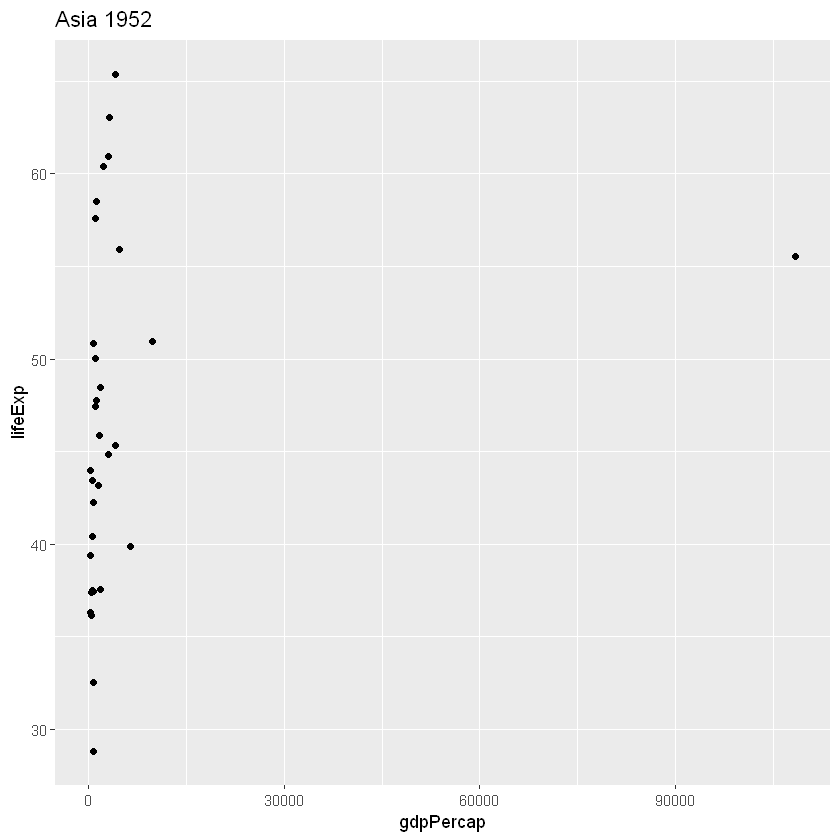

In [117]:
plot_list[[1]]

In [118]:
# pmap() allows you to iterate over an arbitrary number of objects

### nesting
#creating list inside a data frame

In [186]:
gapminder_nested <- gapminder %>% 
      group_by(continent)  %>% 
      nest()
  gapminder_nested %>%  dim
# this thing can be used in the adverse event plotting for subjects, nest AE by Subject IDS

[1] 5 2

`the first column is the variable that we grouped by, continent, and the second column is the rest of the data frame corresponding to that group (as if you had filtered the data frame to the specific continent`

In [143]:
gapminder_nested$data[[1]] %>% head # checking first continent

country     year lifeExp pop      gdpPercap
1 Afghanistan 1952 28.801   8425333 779.4453 
2 Afghanistan 1957 30.332   9240934 820.8530 
3 Afghanistan 1962 31.997  10267083 853.1007 
4 Afghanistan 1967 34.020  11537966 836.1971 
5 Afghanistan 1972 36.088  13079460 739.9811 
6 Afghanistan 1977 38.438  14880372 786.1134

In [144]:
# or
gapminder_nested %>% 
  # extract the first entry from the data column
  pluck("data", 1) %>% head

country     year lifeExp pop      gdpPercap
1 Afghanistan 1952 28.801   8425333 779.4453 
2 Afghanistan 1957 30.332   9240934 820.8530 
3 Afghanistan 1962 31.997  10267083 853.1007 
4 Afghanistan 1967 34.020  11537966 836.1971 
5 Afghanistan 1972 36.088  13079460 739.9811 
6 Afghanistan 1977 38.438  14880372 786.1134

In [145]:
# to apply mutate functions to a column storing list data, one needs to wrap the function you want to apply in a map function.

tibble(list_col = list(c(1, 5, 7), 
                       5, 
                       c(10, 10, 11))) %>%
  mutate(list_sum = map(list_col, sum))

list_col   list_sum
1 1, 5, 7    13      
2 5          5       
3 10, 10, 11 31

In [146]:
# calculate the average life expectancy within each continent and add it as a new column using mutate()

In [149]:
# how to do this
# 1. try with a sample
# the first entry of the "data" column
.x <- gapminder_nested %>% pluck("data", 1)
.x %>% head
#calculate mean
mean(.x$lifeExp)

country     year lifeExp pop      gdpPercap
1 Afghanistan 1952 28.801   8425333 779.4453 
2 Afghanistan 1957 30.332   9240934 820.8530 
3 Afghanistan 1962 31.997  10267083 853.1007 
4 Afghanistan 1967 34.020  11537966 836.1971 
5 Afghanistan 1972 36.088  13079460 739.9811 
6 Afghanistan 1977 38.438  14880372 786.1134

[1] 60.0649

In [153]:
# 2. so now copy paste above method incorporating map_dbl
gapminder_nested %>% mutate(meanLifeExpectancy = map_dbl(data, ~{
    mean(.x$lifeExp)
})) %>% head

continent
1 Asia     
2 Europe   
3 Africa   
4 Americas 
5 Oceania  
  data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [154]:
# above can be done using dplyr too
# fitting a model
# fit a model separately for each continent
gapminder_nested <- gapminder_nested %>% 
  mutate(lm_obj = map(data, ~lm(lifeExp ~ pop + gdpPercap + year, data = .x)))
gapminder_nested

continent
1 Asia     
2 Europe   
3 Africa   
4 Americas 
5 Oceania  
  data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [155]:
gapminder_nested %>% pluck("lm_obj", 1)


Call:
lm(formula = lifeExp ~ pop + gdpPercap + year, data = .x)

Coefficients:
(Intercept)          pop    gdpPercap         year  
 -7.833e+02    4.228e-11    2.510e-04    4.251e-01  


In [157]:
# predict the response for each continent
gapminder_nested <- gapminder_nested %>% 
  mutate(pred = map2(lm_obj, data, function(.lm, .data) predict(.lm, .data)))
gapminder_nested
# calculate the correlation between observed and predicted response for each continent
gapminder_nested <- gapminder_nested %>% 
  mutate(cor = map2_dbl(pred, data, function(.pred, .data) cor(.pred, .data$lifeExp)))
gapminder_nested

continent
1 Asia     
2 Europe   
3 Africa   
4 Americas 
5 Oceania  
  data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

continent
1 Asia     
2 Europe   
3 Africa   
4 Americas 
5 Oceania  
  data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [165]:
# splitting
# split the gapminder dataset into a list of data frames
set.seed(23489)
gapminder_list <- gapminder %>% split(gapminder$continent) %>%
  map(~sample_n(., 5))
gapminder_list

$Africa
# A tibble: 5 x 6
  country           continent  year lifeExp      pop gdpPercap
  <fct>             <fct>     <int>   <dbl>    <int>     <dbl>
1 Gambia            Africa     1967    35.9   439593      735.
2 Sierra Leone      Africa     1967    34.1  2662190     1206.
3 Namibia           Africa     1997    58.9  1774766     3900.
4 Equatorial Guinea Africa     1992    47.5   387838     1132.
5 Cote d'Ivoire     Africa     2002    46.8 16252726     1649.

$Americas
# A tibble: 5 x 6
  country            continent  year lifeExp     pop gdpPercap
  <fct>              <fct>     <int>   <dbl>   <int>     <dbl>
1 Dominican Republic Americas   1997    70.0 7992357     3614.
2 Puerto Rico        Americas   1987    74.6 3444468    12281.
3 Honduras           Americas   1992    66.4 5077347     3082.
4 Uruguay            Americas   2007    76.4 3447496    10611.
5 Costa Rica         Americas   1962    62.8 1345187     3461.

$Asia
# A tibble: 5 x 6
  country     continent  year lifeExp       pop gdpPercap
  <fct>       <fct>     <int>   <dbl>     <int>     <dbl>
1 Lebanon     Asia       1967    63.9   2186894     6007.
2 Nepal       Asia       1962    39.4  10332057      652.
3 Yemen, Rep. Asia       1992    55.6  13367997     1879.
4 India       Asia       1972    50.7 567000000      724.
5 Cambodia    Asia       1952    39.4   4693836      368.

$Europe
# A tibble: 5 x 6
  country        continent  year lifeExp      pop gdpPercap
  <fct>          <fct>     <int>   <dbl>    <int>     <dbl>
1 United Kingdom Europe     2002    78.5 59912431    29479.
2 Greece         Europe     1997    77.9 10502372    18748.
3 Belgium        Europe     2002    78.3 10311970    30486.
4 Croatia        Europe     2002    74.9  4481020    11628.
5 Netherlands    Europe     1967    73.8 12596822    15363.

$Oceania
# A tibble: 5 x 6
  country     continent  year lifeExp      pop gdpPercap
  <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
1 Australia   Oceania    1982    74.7 15184200    19477.
2 New Zealand Oceania    1997    77.6  3676187    21050.
3 New Zealand Oceania    2007    80.2  4115771    25185.
4 Australia   Oceania    2007    81.2 20434176    34435.
5 New Zealand Oceania    1952    69.4  1994794    10557.

In [187]:
# keep() only keeps elements of a list that satisfy a given condition
gapminder_list %>%
  keep(~{mean(.x$lifeExp) > 70})

$Americas
# A tibble: 5 x 6
  country            continent  year lifeExp     pop gdpPercap
  <fct>              <fct>     <int>   <dbl>   <int>     <dbl>
1 Dominican Republic Americas   1997    70.0 7992357     3614.
2 Puerto Rico        Americas   1987    74.6 3444468    12281.
3 Honduras           Americas   1992    66.4 5077347     3082.
4 Uruguay            Americas   2007    76.4 3447496    10611.
5 Costa Rica         Americas   1962    62.8 1345187     3461.

$Europe
# A tibble: 5 x 6
  country        continent  year lifeExp      pop gdpPercap
  <fct>          <fct>     <int>   <dbl>    <int>     <dbl>
1 United Kingdom Europe     2002    78.5 59912431    29479.
2 Greece         Europe     1997    77.9 10502372    18748.
3 Belgium        Europe     2002    78.3 10311970    30486.
4 Croatia        Europe     2002    74.9  4481020    11628.
5 Netherlands    Europe     1967    73.8 12596822    15363.

$Oceania
# A tibble: 5 x 6
  country     continent  year lifeExp      pop gdpPercap
  <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
1 Australia   Oceania    1982    74.7 15184200    19477.
2 New Zealand Oceania    1997    77.6  3676187    21050.
3 New Zealand Oceania    2007    80.2  4115771    25185.
4 Australia   Oceania    2007    81.2 20434176    34435.
5 New Zealand Oceania    1952    69.4  1994794    10557.

In [188]:
# discard() does the opposite of keep()
gapminder_list %>%
  discard(~{mean(.x$lifeExp) > 70})

$Africa
# A tibble: 5 x 6
  country           continent  year lifeExp      pop gdpPercap
  <fct>             <fct>     <int>   <dbl>    <int>     <dbl>
1 Gambia            Africa     1967    35.9   439593      735.
2 Sierra Leone      Africa     1967    34.1  2662190     1206.
3 Namibia           Africa     1997    58.9  1774766     3900.
4 Equatorial Guinea Africa     1992    47.5   387838     1132.
5 Cote d'Ivoire     Africa     2002    46.8 16252726     1649.

$Asia
# A tibble: 5 x 6
  country     continent  year lifeExp       pop gdpPercap
  <fct>       <fct>     <int>   <dbl>     <int>     <dbl>
1 Lebanon     Asia       1967    63.9   2186894     6007.
2 Nepal       Asia       1962    39.4  10332057      652.
3 Yemen, Rep. Asia       1992    55.6  13367997     1879.
4 India       Asia       1972    50.7 567000000      724.
5 Cambodia    Asia       1952    39.4   4693836      368.

### reduce
`reduce() is designed to combine (reduces) all of the elements of a list into a single object by iteratively applying a binary function (a function that takes two inputs)`

In [171]:
reduce(c(1, 2, 3), sum)
## [1] 6
# accumulate() also returns the intermediate values.

accumulate(c(1, 2, 3), sum)


[1] 6

[1] 1 3 6

```An example of when reduce() might come in handy is when you want to perform many left_join()s in a row, or to do repeated rbinds() (e.g. to bind the rows of the list back together into a single data frame)```

  

In [172]:
gapminder_list %>%
  reduce(rbind)

country            continent year lifeExp pop       gdpPercap 
1  Gambia             Africa    1967 35.857     439593   734.7829
2  Sierra Leone       Africa    1967 34.113    2662190  1206.0435
3  Namibia            Africa    1997 58.909    1774766  3899.5243
4  Equatorial Guinea  Africa    1992 47.545     387838  1132.0550
5  Cote d'Ivoire      Africa    2002 46.832   16252726  1648.8008
6  Dominican Republic Americas  1997 69.957    7992357  3614.1013
7  Puerto Rico        Americas  1987 74.630    3444468 12281.3419
8  Honduras           Americas  1992 66.399    5077347  3081.6946
9  Uruguay            Americas  2007 76.384    3447496 10611.4630
10 Costa Rica         Americas  1962 62.842    1345187  3460.9370
11 Lebanon            Asia      1967 63.870    2186894  6006.9830
12 Nepal              Asia      1962 39.393   10332057   652.3969
13 Yemen, Rep.        Asia      1992 55.599   13367997  1879.4967
14 India              Asia      1972 50.651  567000000   724.0325
15 Cambodia           Asia      1952 39.417    4693836   368.4693
16 United Kingdom     Europe    2002 78.471   59912431 29478.9992
17 Greece             Europe    1997 77.869   10502372 18747.6981
18 Belgium            Europe    2002 78.320   10311970 30485.8838
19 Croatia            Europe    2002 74.876    4481020 11628.3890
20 Netherlands        Europe    1967 73.820   12596822 15363.2514
21 Australia          Oceania   1982 74.740   15184200 19477.0093
22 New Zealand        Oceania   1997 77.550    3676187 21050.4138
23 New Zealand        Oceania   2007 80.204    4115771 25185.0091
24 Australia          Oceania   2007 81.235   20434176 34435.3674
25 New Zealand        Oceania   1952 69.390    1994794 10556.5757